# Initial EDA

In [26]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns

In [2]:
pd.options.display.max_rows = 4000


In [3]:
DATA_DIR = '../data'

In [4]:
train_df = pd.read_pickle(os.path.join(DATA_DIR, 'interim', 'train_reduced.pkl')).sample(frac=0.25,random_state=13)
train_df.shape

(147635, 434)

In [5]:
train_df['isFraud'].describe()

count    147635.000000
mean          0.035093
std           0.184016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

In [6]:
train_df['TransactionDT'].describe()

count    1.476350e+05
mean     7.366157e+06
std      4.615224e+06
min      8.646900e+04
25%      3.021557e+06
50%      7.271472e+06
75%      1.124650e+07
max      1.581109e+07
Name: TransactionDT, dtype: float64

In [7]:
# get only predictor variables
predictors = list(set(train_df.columns) - set(['TransactionID', 'isFraud']))

In [8]:
predictors

['V234',
 'V156',
 'V36',
 'V235',
 'V132',
 'V76',
 'V162',
 'V292',
 'V110',
 'V210',
 'V332',
 'V200',
 'V161',
 'V66',
 'V150',
 'V158',
 'C9',
 'V331',
 'V310',
 'D11',
 'id_27',
 'D12',
 'id_28',
 'V92',
 'V86',
 'V289',
 'V215',
 'R_emaildomain',
 'V224',
 'V191',
 'V25',
 'V119',
 'id_32',
 'V62',
 'V2',
 'V293',
 'TransactionDT',
 'V226',
 'V26',
 'id_18',
 'V126',
 'D9',
 'V120',
 'V319',
 'V173',
 'V251',
 'V252',
 'V279',
 'V189',
 'id_11',
 'V304',
 'V249',
 'V109',
 'V140',
 'M2',
 'V104',
 'V276',
 'V105',
 'V273',
 'V168',
 'V94',
 'V33',
 'V267',
 'V186',
 'id_22',
 'V330',
 'C4',
 'V40',
 'V230',
 'V3',
 'V106',
 'id_35',
 'V287',
 'M9',
 'V315',
 'D1',
 'V165',
 'V21',
 'C13',
 'V316',
 'V176',
 'V51',
 'V121',
 'V108',
 'V164',
 'V23',
 'V297',
 'V203',
 'V261',
 'ProductCD',
 'V217',
 'V336',
 'V30',
 'M4',
 'D15',
 'V148',
 'D5',
 'V39',
 'id_37',
 'V337',
 'V335',
 'V312',
 'V324',
 'V208',
 'V272',
 'id_09',
 'V195',
 'V232',
 'V18',
 'V49',
 'V178',
 'V334',
 '

In [9]:
float_predictors = [(x, train_df[x].dtype.name) for x in predictors if train_df[x].dtype.name[:5] == 'float']

In [10]:
train_df.dtypes

TransactionID      uint32
isFraud             uint8
TransactionDT      uint32
TransactionAmt    float32
ProductCD          object
card1              uint16
card2              uint16
card3               uint8
card4              object
card5               uint8
card6              object
addr1              uint16
addr2               uint8
dist1              uint16
dist2              uint16
P_emaildomain      object
R_emaildomain      object
C1                 uint16
C2                 uint16
C3                  uint8
C4                 uint16
C5                 uint16
C6                 uint16
C7                 uint16
C8                 uint16
C9                  uint8
C10                uint16
C11                uint16
C12                uint16
C13                uint16
C14                uint16
D1                 uint16
D2                 uint16
D3                 uint16
D4                  int16
D5                 uint16
D6                  int16
D7                 uint16
D8          

In [11]:
df = train_df.iloc[:5,:5]

In [12]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD
57903,3044903,0,1349089,108.500000,W
400901,3387901,0,10106096,312.950012,W
235736,3222736,0,5586574,490.119995,W
200779,3187779,0,4570886,17.950001,W
226515,3213515,0,5351581,114.949997,W


In [13]:
df['new_var'] = 123

In [14]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,new_var
57903,3044903,0,1349089,108.500000,W,123
400901,3387901,0,10106096,312.950012,W,123
235736,3222736,0,5586574,490.119995,W,123
200779,3187779,0,4570886,17.950001,W,123
226515,3213515,0,5351581,114.949997,W,123


In [15]:
def extract_df(col):
    df = train_df[['isFraud']].copy()
    df['value'] = train_df[col].copy()
    df['var_name'] = col
    return df

In [16]:
ll= [extract_df(col[0]) for col in float_predictors]

In [17]:
df = pd.concat(ll,ignore_index=True)

In [18]:
df.shape

(15058770, 3)

In [25]:
df.loc[df.var_name=='V135'].shape

(147635, 3)

In [20]:
float_predictors

[('V132', 'float32'),
 ('V162', 'float32'),
 ('V210', 'float32'),
 ('V332', 'float32'),
 ('V161', 'float32'),
 ('V331', 'float32'),
 ('V310', 'float32'),
 ('V215', 'float32'),
 ('id_32', 'float64'),
 ('id_18', 'float64'),
 ('V126', 'float32'),
 ('D9', 'float32'),
 ('V319', 'float32'),
 ('id_11', 'float32'),
 ('V276', 'float32'),
 ('V273', 'float32'),
 ('V267', 'float32'),
 ('id_22', 'float64'),
 ('V315', 'float32'),
 ('V165', 'float32'),
 ('V316', 'float32'),
 ('V164', 'float32'),
 ('V203', 'float32'),
 ('V336', 'float32'),
 ('V337', 'float32'),
 ('V335', 'float32'),
 ('V312', 'float32'),
 ('V208', 'float32'),
 ('V272', 'float32'),
 ('id_09', 'float64'),
 ('V334', 'float32'),
 ('V306', 'float32'),
 ('V166', 'float32'),
 ('V311', 'float32'),
 ('V133', 'float32'),
 ('id_03', 'float64'),
 ('id_20', 'float64'),
 ('id_06', 'float64'),
 ('V128', 'float32'),
 ('V321', 'float32'),
 ('V320', 'float32'),
 ('V202', 'float32'),
 ('V264', 'float32'),
 ('id_08', 'float64'),
 ('D8', 'float32'),
 ('V2

In [23]:
df.groupby(['var_name']).count()

,isFraud,value
var_name,,
D8,147635,147635
D9,147635,147635
TransactionAmt,147635,147635
V126,147635,147635
V127,147635,147635
V128,147635,147635
V129,147635,147635
V130,147635,147635
V131,147635,147635


In [43]:
df2 = df.loc[df.var_name=='id_02']
df2['log_value'] = df2.loc[:,'value'].apply(np.log)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


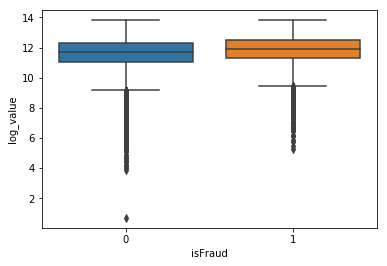

In [44]:
sns.boxplot("isFraud", "log_value", data=df2)